In [182]:
import PIL
import torch
import torchvision
from torchvision import transforms
from torch import nn
import numpy as np
from models import Autoencoders

In [158]:
class UNetAutoencoder(nn.Module):
    def __init__(self):
        super(UNetAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

In [183]:
model=Autoencoders.Simple_autoencoder()
for param in model.encoder.parameters():
    param.requires_grad = False

In [184]:
model

Simple_autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ConvTranspose2d(64, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
)

In [191]:
a_image=PIL.Image.open("/Users/kunkerdthaisong/ipu/ntu_rgb_proj/spec/S001C001P001R001A005.skeleton.npy.png")
a_image=a_image.convert("RGB")
m, s = np.mean(a_image, axis=(0, 1)), np.std(a_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])

ten_img=preprocess(a_image)
ten_img.shape

torch.Size([3, 334, 336])

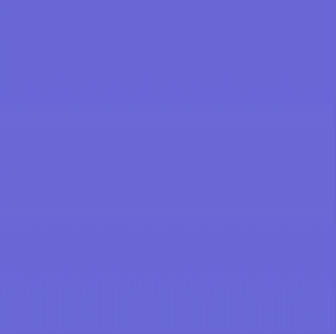

In [192]:
to_img=transforms.ToPILImage()
to_img(ten_img)

In [193]:
output_tensor = model(ten_img.unsqueeze(0))
output_image = torchvision.transforms.ToPILImage()(output_tensor.squeeze(0))
output_image=torchvision.transforms.Resize(334)(output_image)

In [194]:
output_image.save("/Users/kunkerdthaisong/ipu/ntu_rgb_proj/utils/x.png")